In [80]:
import numpy as np
import matplotlib.pyplot as plt

In [81]:
def gaussian_pdf(x, mu=0, sigma=1):
        u = (x - mu) / abs(sigma)
        y = (1 / (np.sqrt(2 * np.pi) * abs(sigma)))
        return y * np.exp(-0.5 * u**2)

In [104]:
def uniform_pdf(x):
    return 1 * ((x >= 0) & (x <= 1))

In [83]:
def kernel_smoothed_density(x_values, samples, width=0.3, kernel_function=gaussian_pdf):
    # Generate an array of kernel values centred on the samples
    kernel_values = [kernel_function(x_value, samples, width) for x_value in x_values]
    return np.average(kernel_values, axis=1)

In [84]:
# General global variables
ax1_color = 'steelblue'
ax2_color = 'firebrick'

### Section 1: Uniform and normal random variables

In [85]:
X_gaussian = np.random.randn(1000)
X_uniform = np.random.rand(1000)


Histograms of random samples compared with true pdf

(-5.0, 5.0)

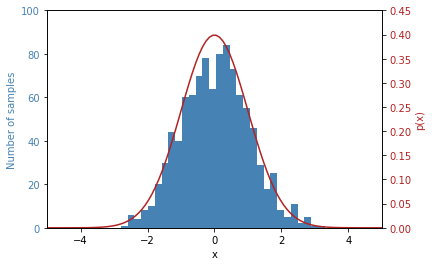

In [98]:
fig, ax1 = plt.subplots()

ax1.hist(X_gaussian, bins=30, color=ax1_color)
ax1.set_xlabel('x')
ax1.set_ylabel('Number of samples', color=ax1_color)
ax1.tick_params(axis='y', labelcolor=ax1_color)
ax1.set_ylim(0, 100)


ax2 = ax1.twinx()
x = np.linspace(-5, 5, 100)
ax2.plot(x, gaussian_pdf(x), color=ax2_color)
ax2.set_ylabel('p(x)', color=ax2_color)
ax2.tick_params(axis='y', labelcolor=ax2_color)
ax2.set_ylim(0, 0.45)
ax2.set_xlim(-5, 5)

(-0.2, 1.2)

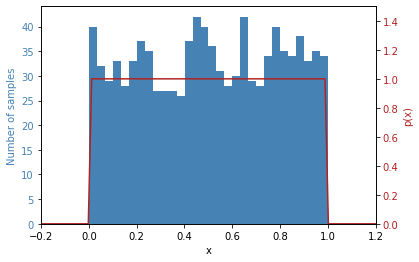

In [108]:
fig, ax1 = plt.subplots()

x = np.linspace(-0.2, 1.2, 100)

ax1.hist(X_uniform, bins=30, color=ax1_color)
ax1.set_xlabel('x')
ax1.set_ylabel('Number of samples', color=ax1_color)
ax1.tick_params(axis='y', labelcolor=ax1_color)

ax2 = ax1.twinx()
ax2.plot(x, uniform_pdf(x), color=ax2_color)
ax2.set_ylabel('p(x)', color=ax2_color)
ax2.tick_params(axis='y', labelcolor=ax2_color)
ax2.set_ylim(0, 1.5)
ax2.set_xlim(-0.2, 1.2)

Kernel smoothing of random samples compared with true pdf

(-5.0, 5.0)

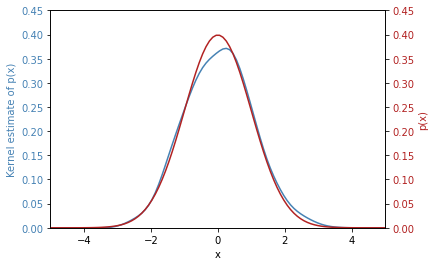

In [88]:
fig, ax1 = plt.subplots()

x = np.linspace(-5, 5, 100)

ax1.plot(x, kernel_smoothed_density(x, X_gaussian), color=ax1_color)
ax1.set_xlabel('x')
ax1.set_ylabel('Kernel estimate of p(x)', color=ax1_color)
ax1.tick_params(axis='y', labelcolor=ax1_color)
ax1.set_ylim(0, 0.45)

ax2 = ax1.twinx()
ax2.plot(x, gaussian_pdf(x), color=ax2_color)
ax2.set_ylabel('p(x)', color=ax2_color)
ax2.tick_params(axis='y', labelcolor=ax2_color)
ax2.set_ylim(0, 0.45)
ax2.set_xlim(-5, 5)

(-0.2, 1.3)

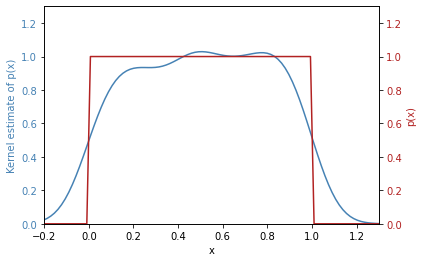

In [109]:
fig, ax1 = plt.subplots()

x = np.linspace(-0.3, 1.3, 100)

ax1.plot(x, kernel_smoothed_density(x, X_uniform, width=0.1), color=ax1_color)
ax1.set_xlabel('x')
ax1.set_ylabel('Kernel estimate of p(x)', color=ax1_color)
ax1.tick_params(axis='y', labelcolor=ax1_color)
ax1.set_ylim(0, 1.3)


ax2 = ax1.twinx()
ax2.plot(x, uniform_pdf(x), color=ax2_color)
ax2.set_ylabel('p(x)', color=ax2_color)
ax2.tick_params(axis='y', labelcolor=ax2_color)
ax2.set_ylim(0, 1.3)
ax2.set_xlim(-0.2, 1.3)